# RDS Lab 7

Put this Jupyter notebook into the root directory of the DataSynthesizer downloaded from [GitHub](https://github.com/DataResponsibly/DataSynthesizer).

## Install DataSynthesizer

In [1]:
# Add the direcotry of DataSynthesizer into sys.path before importing the code
import os, sys
module_dir = os.getcwd() + '/DataSynthesizer/'
sys.path.append(module_dir)

print(f'Adding into sys.path: {module_dir}')

Adding into sys.path: /Users/hping/technion-files/DataSynthesizer-unstable/DataSynthesizer/


In [2]:
from DataDescriber import DataDescriber
from DataGenerator import DataGenerator
from ModelInspector import ModelInspector

In [3]:
describer = DataDescriber()
generator = DataGenerator()

## Modules and Parameters

In [4]:
from lib.utils import read_json_file

import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sensitive_data_file = './data/adult_reduced.csv'
description_files = {'random mode':                   './out/description(random).json', 
                     'independent attribute mode':    './out/description(independent).json', 
                     'correlated attribute mode':     './out/description(correlated).json'}
synthetic_data_files = {'random mode':                './out/synthetic data(random).csv', 
                        'independent attribute mode': './out/synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/synthetic data(correlated).csv'}


output_data_size = 1000

In [6]:
real_data = pd.read_csv(sensitive_data_file)
real_data.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


## Random mode

In [7]:
describer.describe_dataset_in_random_mode(sensitive_data_file)

In [8]:
describer.save_dataset_description_to_file(description_files['random mode'])

#### Important parameters here

- __seed__: initialize the random number generator for both `random` and `np.random`
- __mininum__, __maxmimum__: hide the min/max informtion in the sensitive data 

In [9]:
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

In [10]:
generator.save_synthetic_data(synthetic_data_files['random mode'])

In [11]:
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

In [12]:
real_data.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


In [13]:
synthetic_random.head()

,age,education,sex,relationship,marital-status,income
0,44,Preschool,Male,Husband,Married-civ-spouse,<=50K
1,47,Some-college,Female,Husband,Separated,>50K
2,64,Assoc-acdm,Female,Not-in-family,Separated,<=50K
3,67,Masters,Male,Other-relative,Married-civ-spouse,<=50K
4,67,12th,Male,Own-child,Never-married,>50K


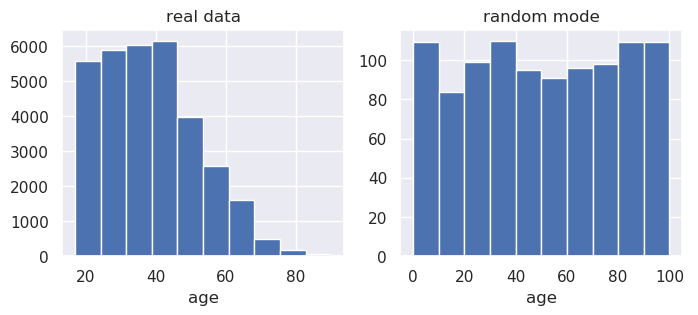

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_random['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('random mode');

In [15]:
relationship_real = real_data['relationship'].value_counts()
relationship_random = synthetic_random['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), 
                             relationship_random.to_frame(), 
                             left_index=True, 
                             right_index=True, 
                             suffixes=('_real', '_random_mode'))
relationship_both

,relationship_real,relationship_random_mode
Husband,13193,156
Not-in-family,8305,159
Own-child,5068,189
Unmarried,3446,165
Wife,1568,166
Other-relative,981,165


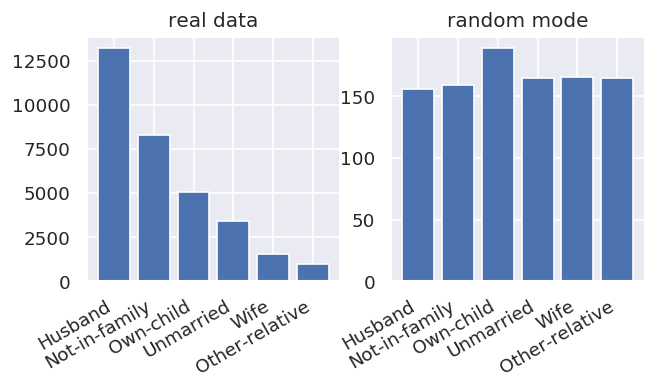

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_random_mode'])
axes[0].set_title('real data')
axes[1].set_title('random mode')
fig.autofmt_xdate()

In [17]:
description_json = read_json_file(description_files['random mode'])

In [18]:
description_json.keys()

dict_keys(['meta', 'attribute_description'])

In [19]:
print(json.dumps(description_json['attribute_description']['relationship'], indent=4))

{
    "name": "relationship",
    "data_type": "String",
    "is_categorical": true,
    "is_candidate_key": false,
    "min": 4,
    "max": 14,
    "missing_rate": 0.0,
    "distribution_bins": [
        "Not-in-family",
        "Husband",
        "Wife",
        "Own-child",
        "Unmarried",
        "Other-relative"
    ],
    "distribution_probabilities": [
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666
    ]
}


## Independent attribute mode

In [20]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)

In [21]:
describer.save_dataset_description_to_file(description_files['independent attribute mode'])

In [22]:
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                               description_file=description_files['independent attribute mode'], 
                                               seed=0)

In [23]:
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])

In [24]:
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

In [25]:
synthetic_independent.head()

,age,education,sex,relationship,marital-status,income
0,42.0,HS-grad,Male,Not-in-family,Married-civ-spouse,<=50K
1,45.0,10th,Male,Not-in-family,Married-civ-spouse,<=50K
2,40.0,HS-grad,Male,Own-child,Divorced,<=50K
3,36.0,HS-grad,Female,Unmarried,Married-civ-spouse,<=50K
4,33.0,11th,Male,Own-child,Divorced,<=50K


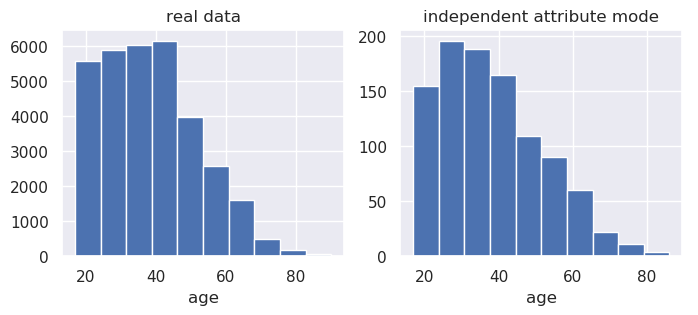

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_independent['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode');

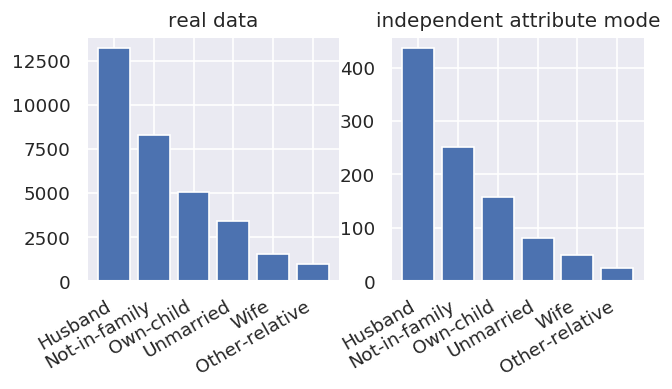

In [27]:
relationship_real = real_data['relationship'].value_counts()
relationship_independent = synthetic_independent['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), 
                             relationship_independent.to_frame(), 
                             left_index=True, 
                             right_index=True, 
                             suffixes=('_real', '_independent_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_independent_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode')
fig.autofmt_xdate()

## Correlated attribute mode

In [28]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=2)

================ Constructing Bayesian Network (BN) ================
Adding ROOT income
Adding attribute age
Adding attribute relationship
Adding attribute marital-status
Adding attribute sex
Adding attribute education
========================== BN constructed ==========================


In [29]:
from lib.utils import display_bayesian_network

In [30]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    age            has parents ['income'].
    relationship   has parents ['age', 'income'].
    marital-status has parents ['relationship', 'age'].
    sex            has parents ['relationship', 'age'].
    education      has parents ['marital-status', 'age'].


In [31]:
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])

In [32]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                        description_file=description_files['correlated attribute mode'],
                                                        seed=0)

In [33]:
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])

In [34]:
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])

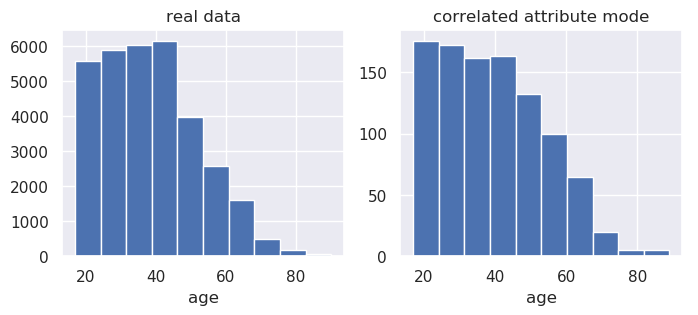

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_correlated['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode');

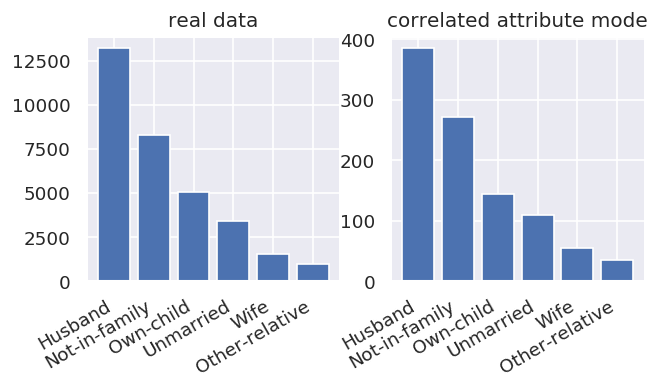

In [36]:
relationship_real = real_data['relationship'].value_counts()
relationship_correlated = synthetic_correlated['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), 
                             relationship_correlated.to_frame(), 
                             left_index=True, 
                             right_index=True, 
                             suffixes=('_real', '_correlated_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_correlated_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode')
fig.autofmt_xdate()

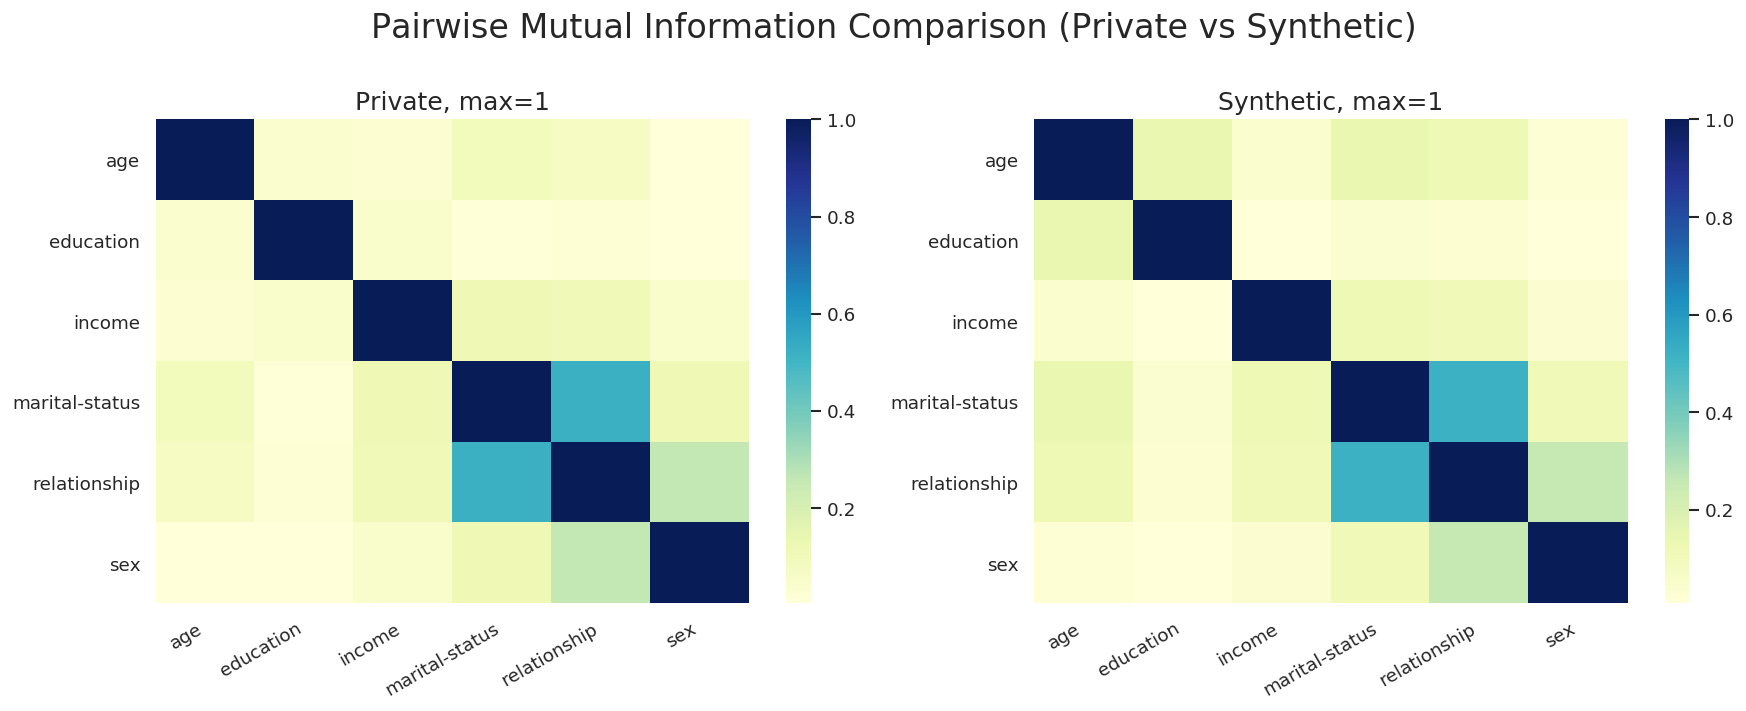

In [37]:
attribute_description = read_json_file(description_files['correlated attribute mode'])['attribute_description']
ModelInspector(real_data, 
               synthetic_correlated, 
               attribute_description).mutual_information_heatmap()

## Statistical measures

### Mutual information

In [38]:
from sklearn.metrics import normalized_mutual_info_score

In [39]:
normalized_mutual_info_score(real_data['marital-status'], 
                             real_data['relationship'], 
                             average_method='arithmetic')

0.5249037668258572

In [40]:
normalized_mutual_info_score(real_data['marital-status'], 
                             real_data['education'], 
                             average_method='arithmetic')

0.014483450445067415

### Two-sample Kolmogorov–Smirnov test

In [41]:
from scipy.stats import ks_2samp

In [42]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

In [43]:
ks_test(real_data, synthetic_random, 'age')

0.33259405423666355

In [44]:
ks_test(real_data, synthetic_independent, 'age')

0.04653290746598687

In [45]:
ks_test(real_data, synthetic_correlated, 'age')

0.034914130401400456

### KL-divergence

In [46]:
from scipy.stats import entropy

In [47]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [48]:
kl_test(real_data, synthetic_random, 'relationship')

0.37194502301936416

In [49]:
kl_test(real_data, synthetic_independent, 'relationship')

0.004852757128718812

In [50]:
kl_test(real_data, synthetic_correlated, 'relationship')

0.0023945420264870447

### Boxplot

In [51]:
import seaborn as sns

In [52]:
real_data.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


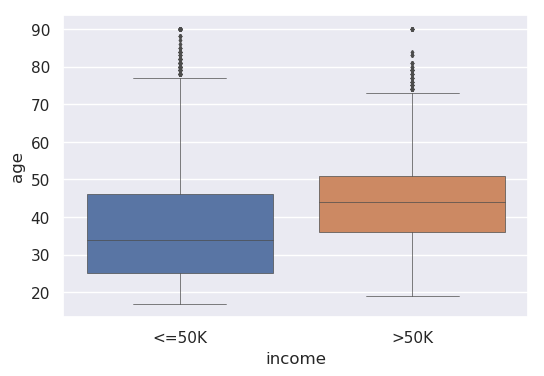

In [53]:
plt.figure(dpi=100)
sns.boxplot(x='income', y='age', data=real_data, linewidth=0.5, fliersize=2);